# BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding


---



Paper : [https://arxiv.org/abs/1810.04805](https://arxiv.org/abs/1810.04805)


BERT stands for <b>"Bidirectional Encoder Representations from Transformers"</b>. So basically it focuses on two main things:

1. BERT alleviates the unidirectionality constraint of previous models by using a **“masked language model” (MLM)** pre-training objective.

2. It shows how that pre-trained representations reduce the need for many heavily-engineered task-specific architectures.

### Unidirectionality constraint of previous models

Unidirectional models are those which process the input token from specified direction(genrally left-to-right), which is a major limitation for standard language models, as they predict a word based only on one direction of context i.e,, it can see only word before(or after) the word being predicted.

A bidirectional model like BERT can see both before and after the word being predicted, so it can understand full context.

The **masked language model (MLM)** randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context.

Unlike left-to-right (unidirectional) language model pre-training, the MLM objective enables the representation to fuse the left and the right context, which allows us to pretrain a deep bidirectional Transformer.

This idea was originally inherited from "***Cloze Test***" (https://en.wikipedia.org/wiki/Cloze_test)

# BERT

There are two main steps included:
- pre-training
- fine-tuning

### Pre-traning

During pre-training, the model is trained on unlabeled data over different pre-training tasks. The pre-traning is all about to make model learn deep representations of language, understanding context from both left and right.

### Fine-tuning

For finetuning, the BERT model is first initialized with the pre-trained parameters, and all of the parameters are fine-tuned using labeled data from the downstream tasks. Each downstream task has separate fine-tuned models, even though they are initialized with the same pre-trained parameters.

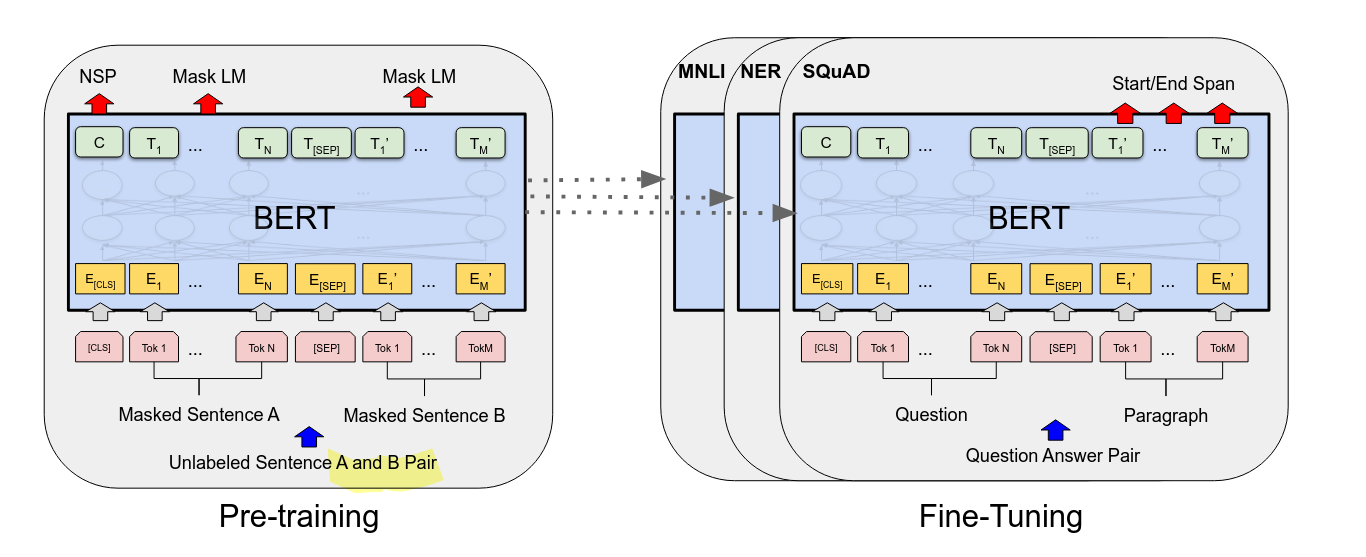

`Fig : Apart from output layers, the same architectures are used in both pre-training and fine-tuning.`

**[CLS]** is a special symbol added in front of every input example, and **[SEP]** is a special separator token (e.g. separating questions/answers).

BERT has a unified architecture across different tasks.

## Model Architecture

BERT’s model architecture is a multi-layer bidirectional **Transformer encoder based** on the original implementation described in Vaswani et al.(Attention Is All You Need, 2017, [https://arxiv.org/abs/1706.03762](https://arxiv.org/abs/1706.03762)) and released in the `tensor2tensor` library.

It only uses encoder part from transformers as BERT is designed for understanding tasks only (Not Genrating task, which is mainly perfomed by decoder.)

## Input/Output Representations

The input representation represent both a single sentence and a pair of sentences (e.g.,〈 Question, Answer 〉) in one token sequence. The first token of every sequence is always a special classification token (**[CLS]**).

Sentence pairs are packed together into a single sequence. The original work differentiate the sentences in two ways. First, they separate them with a special token (**[SEP]**). Second, they add a **learned embedding** to every token **indicating whether it belongs to sentence A or sentence B**.

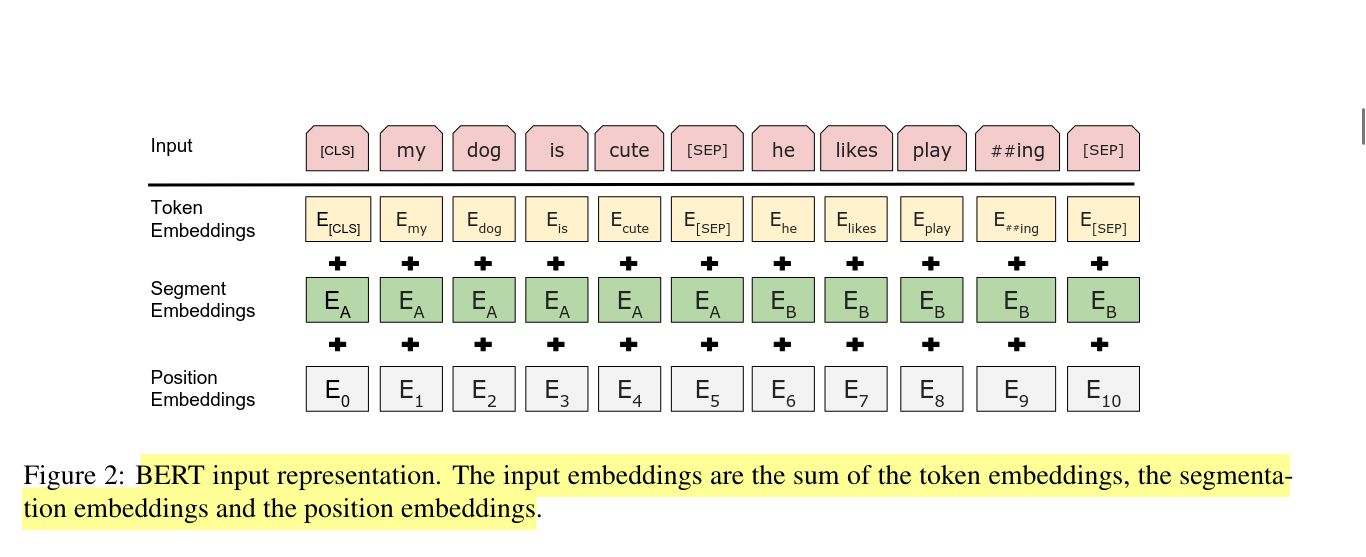

BERT originally uses WordPiece embeddings (Wu et al. 2016) with a 30,000 token vocabulary.

## Pre-training BERT

This further extends to two tasks:
1. Masked LM
2. Next Sentence Prediction (NSP)


### Task #1: Masked LM

Here the authors simply **mask** some percentage of the input tokens **at random**, and then predict those masked tokens. Here this procedure is called **“masked LM” (MLM)**. In this case, the final hidden vectors corresponding to the mask tokens are fed into an **output softmax** over the vocabulary, as in a standard LM.

Original work masked only 15% of all WordPiece tokens in each sequence at random. So it
only predict the masked words rather than reconstructing the entire input.


**Key Challenge in MLM:**

A downside of bi-dirrectional pre-traning is that we are creating a** mismatch between pre-training and fine-tuning**, since the [MASK] token does not appear during fine-tuning, and this may be the case when the model learned to solely reply on [MASK] tokens during pretraning. This may lead to a potential performance drop while fine-tuning.

So to mitigate this, a very wise way is purposed by authors, that is - "**Out of those 15% randomly selected tokens(which were subjected to be masked) 80% of them will be swapped with [MASK] token, 10% of them will be swapped with some other random token (from vocabulary, offcourse), and remaning 10% will be left unchanged**" However the pre-traning predcition will be made on all those 15% tokens, but with this way model will not solely relyy upon [MASK] tokens for its predction task. Now selected token (out of those 15%) will be used to predict the original token with
**cross entropy loss**.



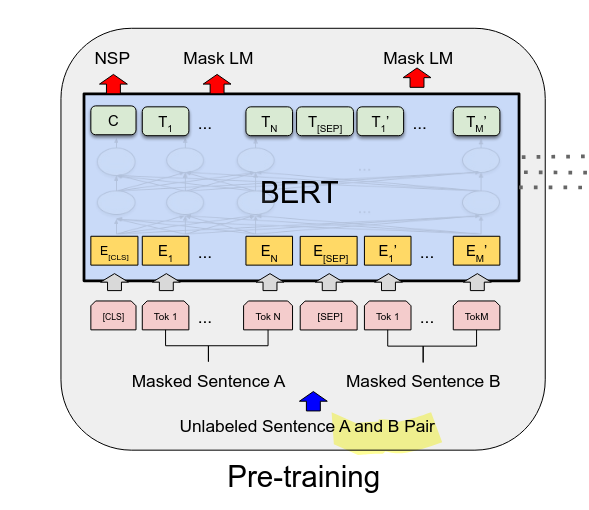

`Fig : C is used for next sentence prediction (NSP).`

### Task #2: Next Sentence Prediction (NSP)

As many NLP tasks are based on relationship between two sentences, which is not directly captured by language modeling.

In order to train a model that understands sentence relationships, **we also pre-train for a binarized next sentence predicti**on task that can be trivially generated from any monolingual corpus. Specifically, when choosing the sentences A and B for each pre-training example, 50% of the time B is the actual next sentence that follows A (labeled as IsNext), and 50% of the time it is a random sentence from the corpus (labeled as NotNext).

## Fine-tuning BERT